<center>
<img src =data/images/extra-extra-credit.gif width = 500 />
</center>

In [35]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [36]:
def sim_multinomial_exactly_q(m, n, ndrivers=20, nshows=30, q=1):
    yes = 0
    no = 0

    # run the simulation n times
    for i in range(n):
    # for i in tqdm(range(n)):
    
        # Initialize the shows list
        shows = [0] * nshows

        # # Each driver visits q unique shows - First Way : Long 
        # for _ in range(ndrivers):
        #     unique_visits = np.random.choice(nshows, q, replace=False)
        #     for visit in unique_visits:
        #         shows[visit] += 1
                
        # Each driver visits q unique shows - First Way : Short 
        for visit in np.concatenate([np.random.choice(nshows, q, replace=False) for _ in range(ndrivers)]):
            shows[visit] += 1
            
#         # Each driver visits q unique shows - Second Way : Long
#         for _ in range(ndrivers):
#             all_shows = np.arange(nshows)
#             np.random.shuffle(all_shows)
#             unique_visits = all_shows[:q]
#             for visit in unique_visits:
#                 shows[visit] += 1
                
#         # Each driver visits q unique shows - Second Way : Short 
#         for visit in np.concatenate([np.random.permutation(nshows)[:q] for _ in range(ndrivers)]):
#             shows[visit] += 1

        # Which show do I go to?
        me = np.random.randint(0, nshows, m)

        # Is there a driver there?
        meet_a_driver = any(shows[j] > 0 for j in me)
        if meet_a_driver:
            yes += 1
        else:
            no += 1

    return yes / n


In [26]:
# sim_multinomial_exactly_q(1, 100000, ndrivers = 20, nshows = 30, q=2)

100%|██████████████████████████████████████████████████████| 30/30 [00:28<00:00,  1.05it/s]


[0.4914, 0.7395, 0.8599, 0.933, 0.964, 0.9807, 0.9877, 0.994, 0.9962, 0.9972, 0.9984, 0.9992, 0.9995, 1.0, 1.0, 0.9998, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


100%|██████████████████████████████████████████████████████| 30/30 [00:23<00:00,  1.26it/s]


[0.7454, 0.9312, 0.9833, 0.9946, 0.9977, 0.9998, 0.9999, 0.9999, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


100%|██████████████████████████████████████████████████████| 30/30 [00:24<00:00,  1.21it/s]


[0.9733, 0.9983, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


100%|██████████████████████████████████████████████████████| 30/30 [00:25<00:00,  1.15it/s]


[0.9997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


100%|██████████████████████████████████████████████████████| 30/30 [00:28<00:00,  1.05it/s]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


100%|██████████████████████████████████████████████████████| 30/30 [00:31<00:00,  1.04s/it]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


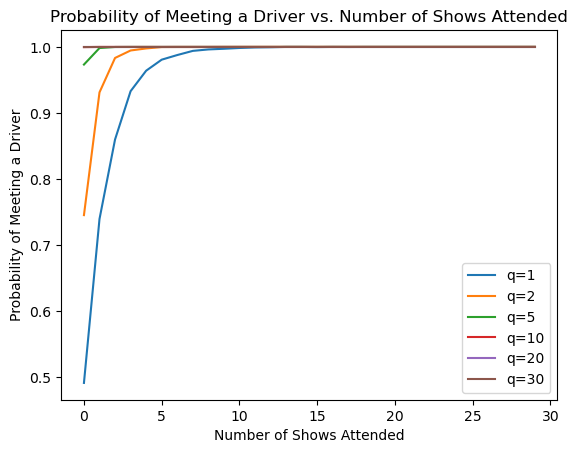

In [37]:
# Simulation setup
exactly_q_shows = [1, 2, 5, 10, 20, 30]

for q in exactly_q_shows:
    probs_q = []
    for i in tqdm(range(1, 31)):
        probs_q.append(sim_multinomial_exactly_q(i, 10000, ndrivers = 20, nshows = 30, q=q))
    print(probs_q)
    plt.plot(probs_q, label=f'q={q}')

# Adding labels and legend
plt.xlabel('Number of Shows Attended')
plt.ylabel('Probability of Meeting a Driver')
plt.title('Probability of Meeting a Driver vs. Number of Shows Attended')
plt.legend()
plt.show()

<center>
<img src =data/images/cat-laptop.gif width = 500 />
</center>

## `tqdm`: Python Progress Bar

`Tqdm` is a Python library that provides a fast and extensible progress bar for loops and iterable processes. Its name is derived from the Arabic word "taqaddum" (تقدّم) which means progress. `tqdm` is celebrated for its efficiency and ease of integration.

### Open-Source Project

`Tqdm` is an open-source project developed and maintained by a community of contributors. `Casper da Costa-Luis` is credited as the original creator of `tqdm`.

#### Repository Link

You can explore more about `tqdm`, access its source code, and contribute to the project at its GitHub repository: [tqdm GitHub Repo](https://github.com/tqdm/tqdm)


<center>
<img src =data/images/anime-shy.gif width = 500 />
</center>